In [2]:
import os
import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt

In [3]:
def plot_time_series(column_name, dfs, starts = [0, 0, 0, 0], ends = [None, None, None, None]):
    plt.figure(figsize=(14, 8))
    for i, (df, label, start, end) in enumerate(zip(dfs, 
                                                    ['Lần đo 1', 'Lần đo 2', 'Lần đo 3', 'Lần đo 4'], 
                                                    starts, 
                                                    ends), start=1):
        if df is not None:
            plt.subplot(2, 2, i)
            plt.plot(df[column_name][start:end], label=f'{label} - {column_name}')
            plt.ylabel(column_name)
            plt.title(f'{label}')
            plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()
    
def plot_multiple_distributions(column_name, device_name, unit_name, dfs, measure_dates):
    plt.figure(figsize=(10, 6))
    
    for i, (df, label, date) in enumerate(zip(dfs, 
                                              ['Lần đo 1', 'Lần đo 2', 'Lần đo 3', 'Lần đo 4'], 
                                              measure_dates), start=1):
        array = df[column_name].to_numpy()
        plt.hist(array, bins=1000, alpha=0.5, label=f'{date} - {label}')
    
    plt.xlabel(unit_name)
    plt.ylabel('Frequency')
    plt.title(f'Phổ của cột {column_name} - {device_name}')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

def get_RMS_data(data_info_df, select_row, data_type):
    # Import dữ liệu
    base_path = "/opt/nilm-shared-data/nilm_device_detection/ICTA2024_dataset/time_series_data/window_1800"
    data_paths = [data_type+"_"+data_info_df.iloc[select_row][f"data{i}"].replace(".xlsx", ".csv") for i in range(1, 5)]

    # Load data
    dfs = []
    for path in data_paths:
        file_path = f"{base_path}/{path}"
        if os.path.isfile(file_path):
            df = pd.read_csv(file_path)
        else:
            df = None
        dfs.append(df)
    return dfs

In [4]:
data_info = "/opt/nilm-shared-data/nilm_device_detection/ICTA2024_dataset/data_information/data_information.xlsx"
data_info_df = pd.read_excel(data_info)
data_info_df.head()

,index,combination,data1,data2,data3,data4
0,0,[0],20240121_data_Nodevice_1.xlsx,20240121_data_Nodevice_2.xlsx,20240121_data_Nodevice_3.xlsx,20240121_data_Nodevice_4.xlsx
1,1,[1],20240113_data_den_1.xlsx,20240114_data_den_2.xlsx,20240115_data_den_3.xlsx,20240121_data_den_4.xlsx
2,2,[2],20240113_data_quat_1.xlsx,20240114_data_quat_2.xlsx,20240115_data_quat_3.xlsx,20240121_data_quat_4.xlsx
3,3,"[1, 2]",20240114_data_den_quat_1.xlsx,20240114_data_den_quat_2.xlsx,20240115_data_den_quat_3.xlsx,20240121_data_den_quat_4.xlsx
4,4,[3],20240113_data_maysay_1.xlsx,20240114_data_maysay_2.xlsx,20240115_data_maysay_3.xlsx,20240121_data_maysay_4.xlsx


[2, 3, 7]


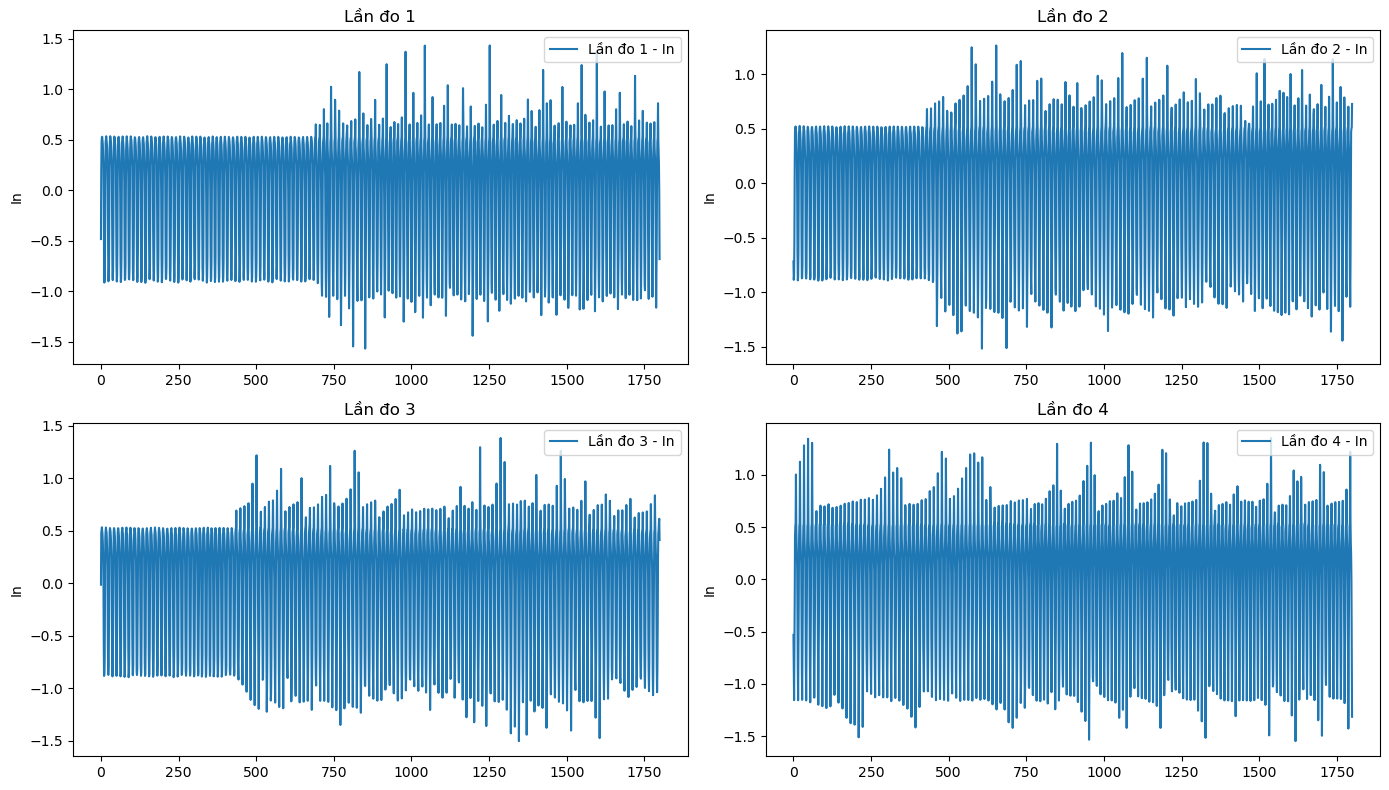

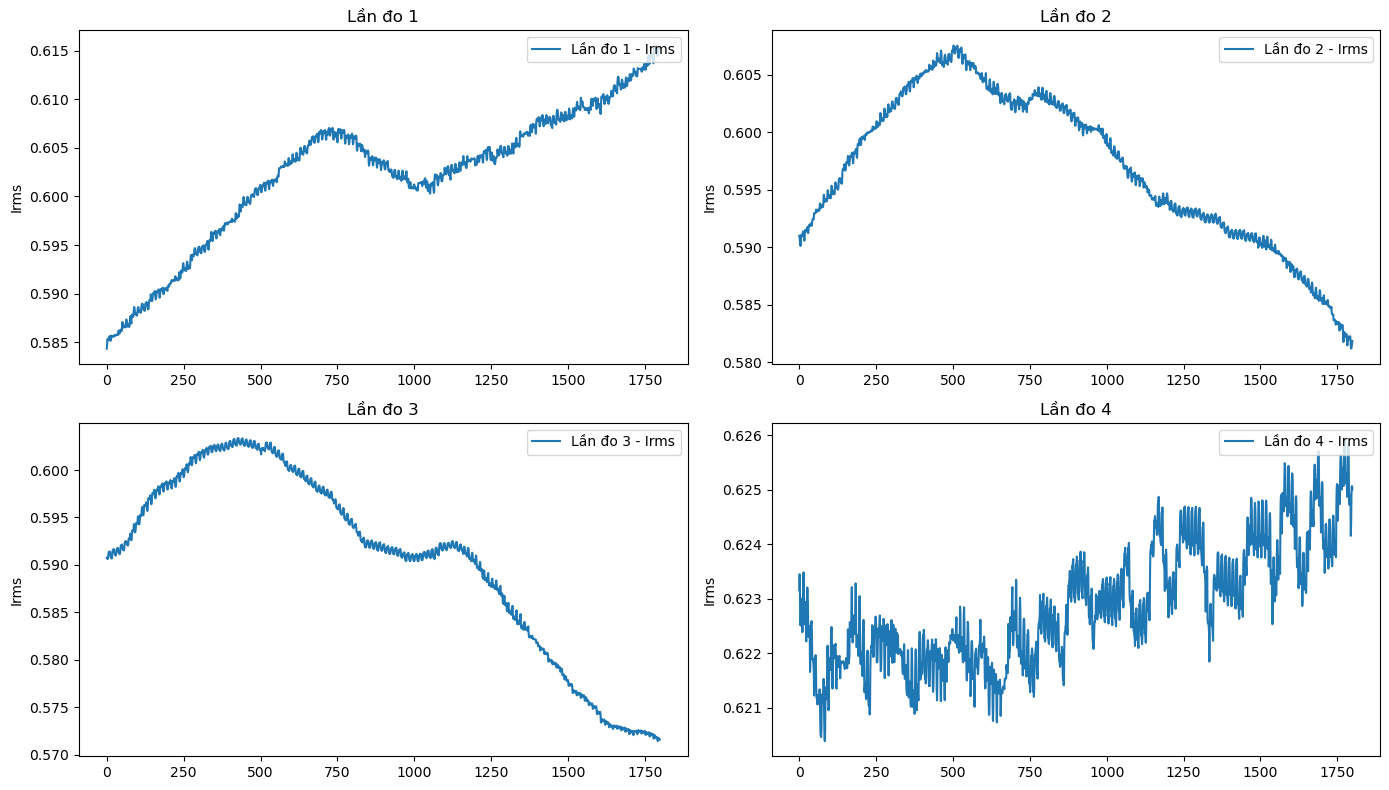

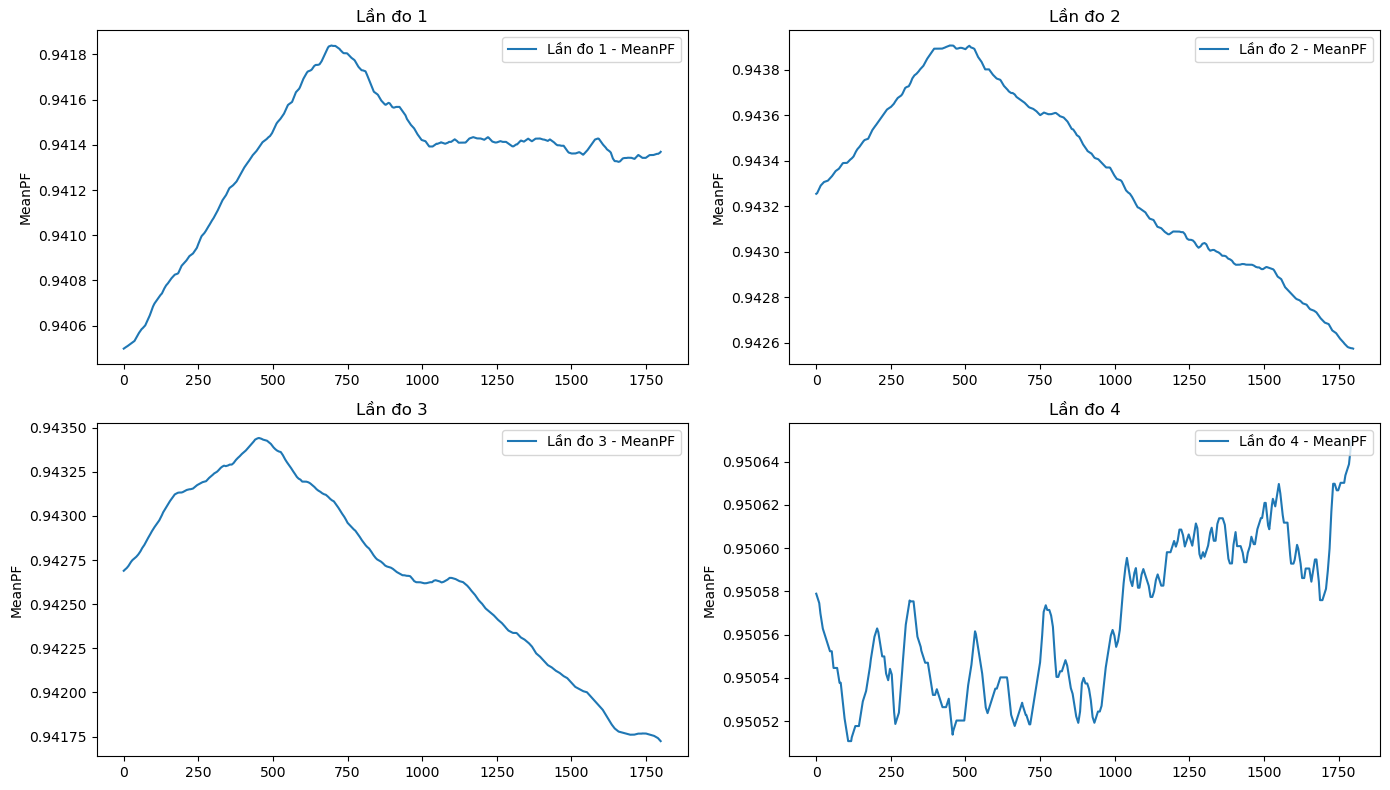

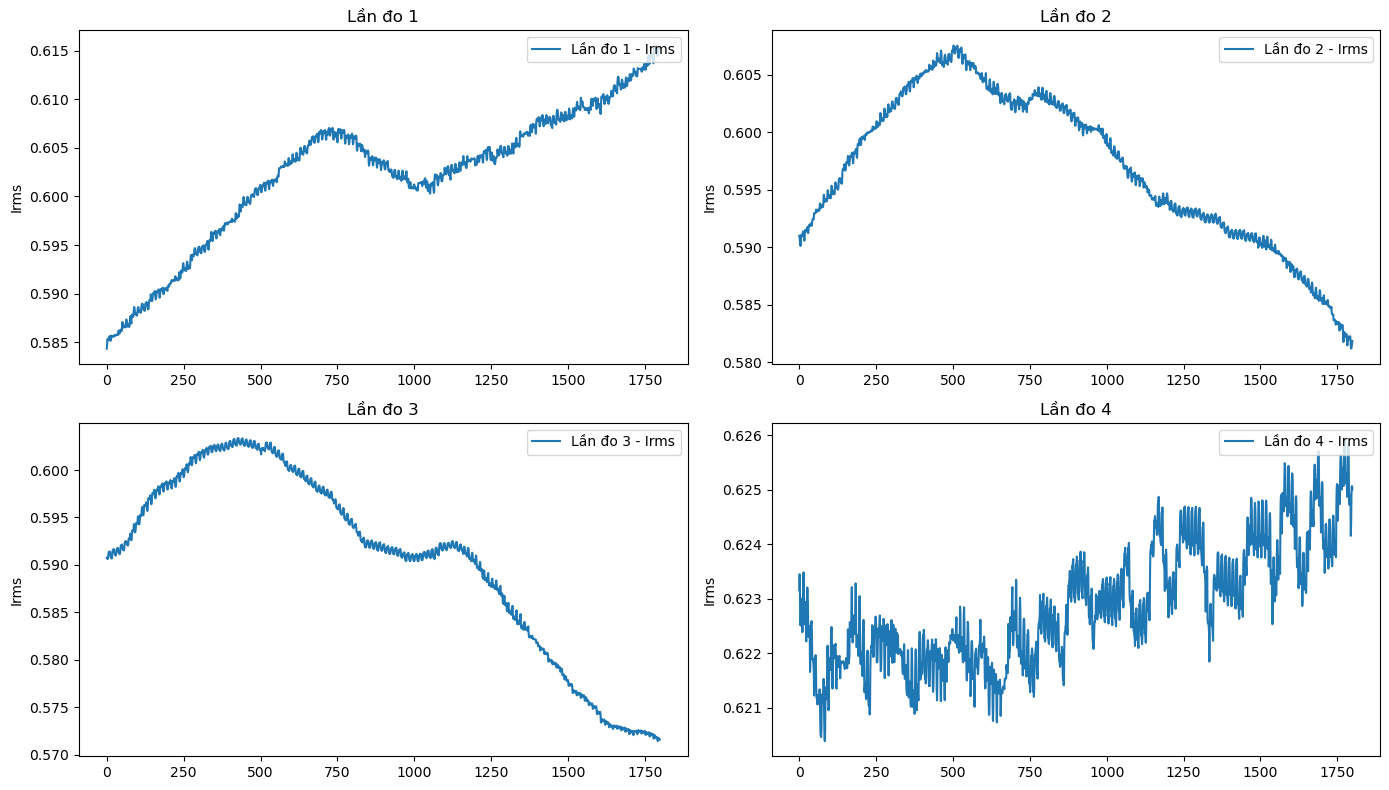

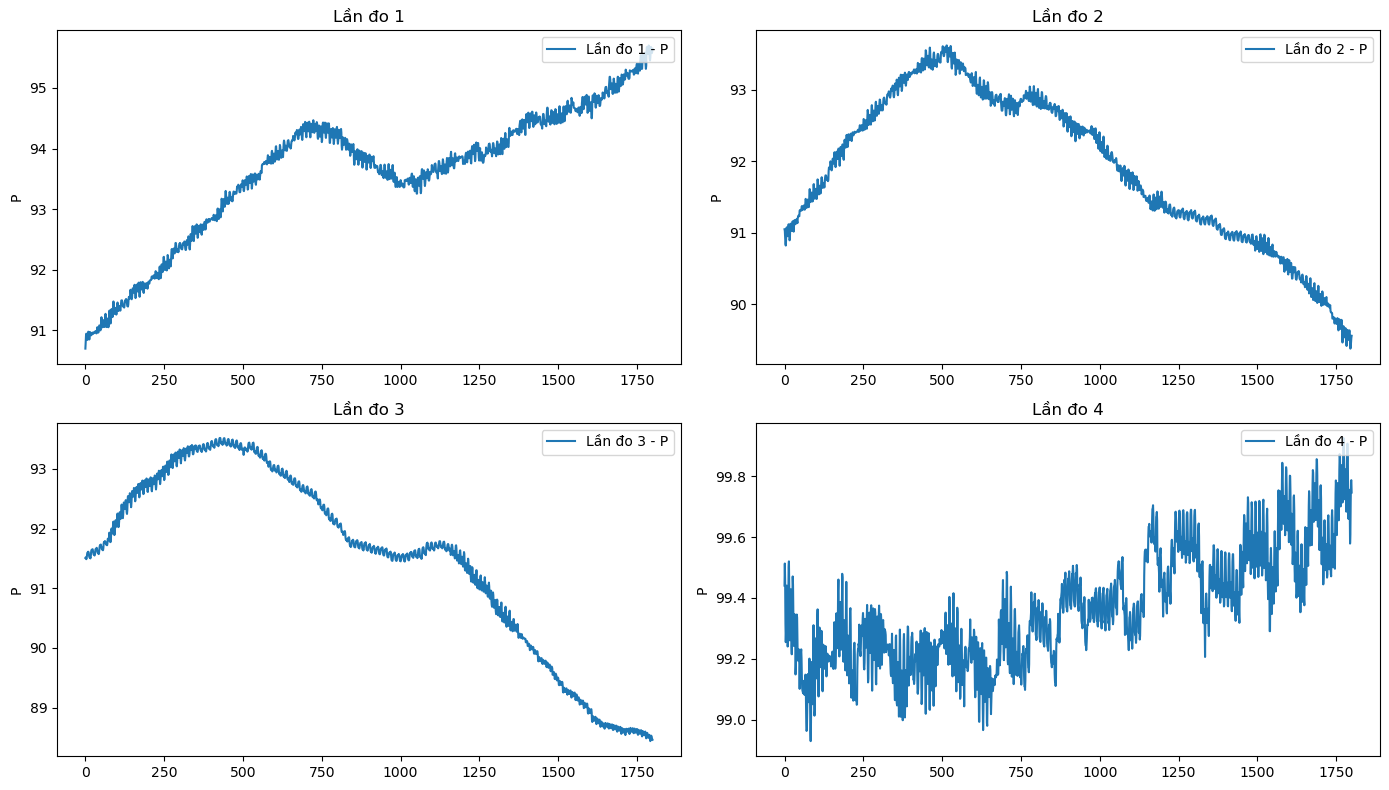

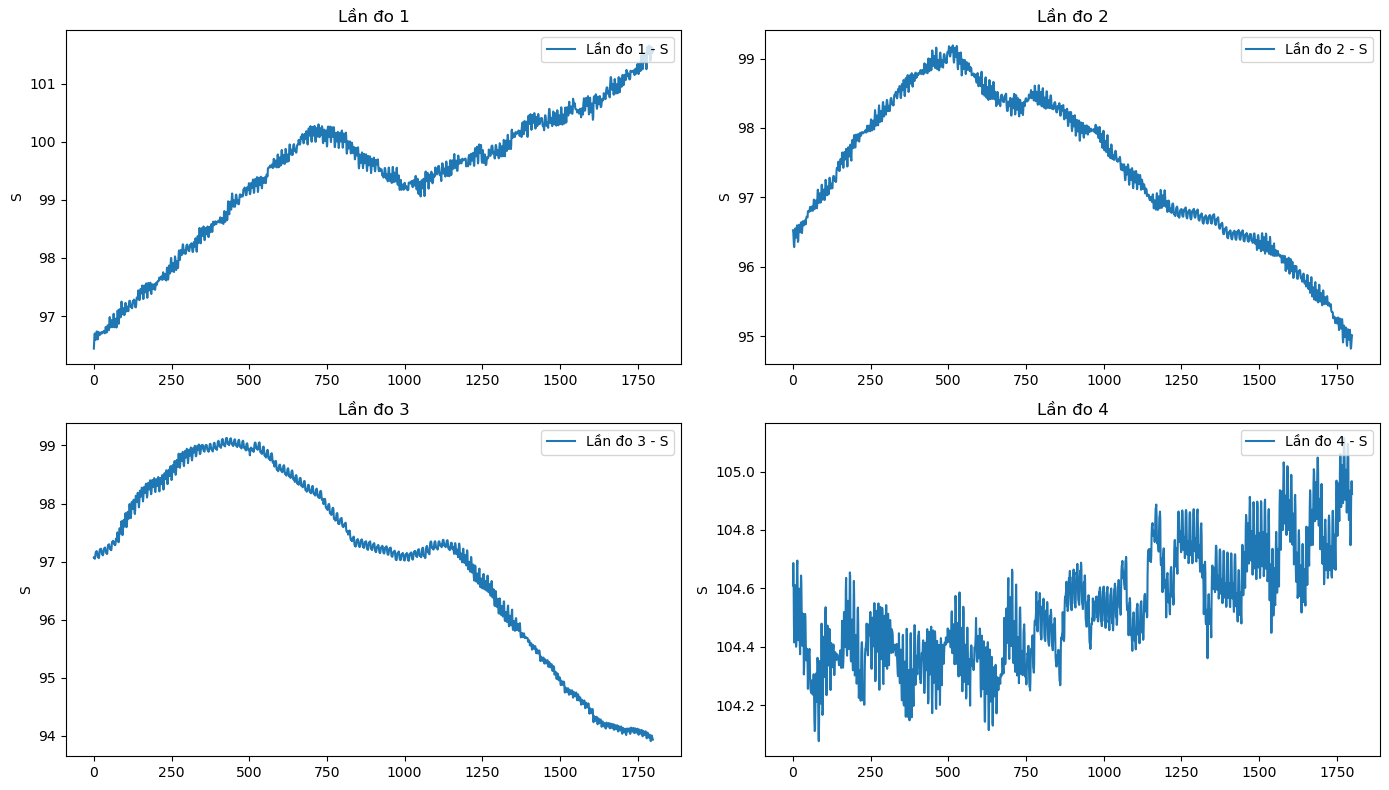

In [5]:
select_row = 70
print(data_info_df.iloc[select_row]["combination"])
check_dfs = get_RMS_data(data_info_df, select_row, "train")
starts = [0, 0, 0, 0]
window_size = 1800
ends = [start + window_size for start in starts]
plot_time_series("In", check_dfs, starts=starts, ends=ends)
plot_time_series("Irms", check_dfs, starts=starts, ends=ends)
plot_time_series("MeanPF", check_dfs, starts=starts, ends=ends)
plot_time_series("Irms", check_dfs, starts=starts, ends=ends)
plot_time_series("P", check_dfs, starts=starts, ends=ends)
plot_time_series("S", check_dfs, starts=starts, ends=ends)

In [26]:
check_dfs[0].columns

Index(['Time', 'In', 'Un', 'PF_n', 'Irms', 'Urms', 'MeanPF', 'P', 'Q', 'S',
       'Label'],
      dtype='object')